In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 検量線

### 検量線用のデータを読み込む

In [2]:
pre_df = pd.read_csv("/content/protein_検量線.csv")
pre_df

,濃度(pg/mL),吸光度1,吸光度2
0,0,0.046,0.067
1,125,0.112,0.158
2,250,0.165,0.254
3,500,0.294,0.316
4,1000,0.544,0.502
5,2000,0.971,0.919
6,4000,1.789,1.782


## "吸光度1" と "吸光度2" の平均を計算し、"mean"という列に入れる。

In [3]:
pre_df["mean"] = pre_df[["吸光度1", "吸光度2"]].mean(axis=1)
pre_df

,濃度(pg/mL),吸光度1,吸光度2,mean
0,0,0.046,0.067,0.0565
1,125,0.112,0.158,0.1350
2,250,0.165,0.254,0.2095
3,500,0.294,0.316,0.3050
4,1000,0.544,0.502,0.5230
5,2000,0.971,0.919,0.9450
6,4000,1.789,1.782,1.7855


### データフレーム(表)からデータを抽出する。
- X: 吸光度の値
- y: 濃度(pg/mL)

In [4]:
X = pre_df[["mean"]].values
y = pre_df["濃度(pg/mL)"].values
X, y

(array([[0.0565],
        [0.135 ],
        [0.2095],
        [0.305 ],
        [0.523 ],
        [0.945 ],
        [1.7855]]),
 array([   0,  125,  250,  500, 1000, 2000, 4000]))

### 最小二乗法モデル

In [5]:
from sklearn.linear_model import LinearRegression

# 学習
model = LinearRegression()
model.fit(X, y)

a = model.coef_[0]
b = model.intercept_
print(f"y = {a}x + {b}")

y = 2341.295631893067x + -199.3371506400856


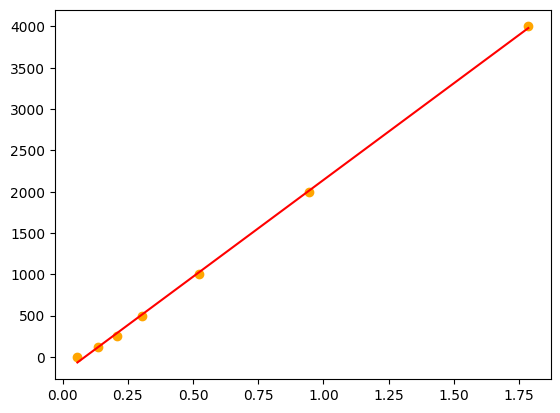

In [6]:
# 検量線データのXから、最小値と最大値を取ってくる。
test_X = [[0.0565], [1.7855]]
# Xの値から、y(濃度)を予測。
test_y = model.predict(test_X)

# 直線を作成->表示
plt.plot(test_X, test_y, color="red")

# 元データを散布
plt.scatter(X, y, color="orange")
plt.show()

### サンプルの測定データを読み込む

In [7]:
sample_df = pd.read_csv("/content/protein_サンプル.csv")
sample_df

,サンプル,吸光度1,吸光度2
0,S001,0.890,0.887
1,S002,0.768,0.832
2,S003,0.317,0.369
3,S004,0.997,0.999
4,S005,0.831,0.870
5,S006,0.236,0.237
6,S007,0.306,0.339
7,S008,0.796,0.797
8,S009,0.307,0.333
9,S010,0.577,0.613


## "吸光度1" と "吸光度2" の平均を計算し、"mean"という列に入れる。

In [8]:
sample_df["mean"] = sample_df[["吸光度1", "吸光度2"]].mean(axis=1)
sample_df.head(5)

,サンプル,吸光度1,吸光度2,mean
0,S001,0.890,0.887,0.8885
1,S002,0.768,0.832,0.8000
2,S003,0.317,0.369,0.3430
3,S004,0.997,0.999,0.9980
4,S005,0.831,0.870,0.8505


### データフレーム(表)からデータを抽出し、最小二乗回帰の式に当てはめる。
- sample_X: 各サンプルの吸光度の値
- sample_y: 各サンプルの予測濃度(pg/mL)

In [9]:
sample_X = sample_df[['mean']].values

sample_y = model.predict(sample_X)
sample_y

array([1880.9040183 , 1673.69935487,  603.7272511 , 2137.27588999,
       1791.93478428,  354.3792663 ,  555.73069065, 1665.50482016,
        549.87745157, 1193.73375034,  641.18798121,  647.04122029,
       2002.65139116, 1894.95179209,  816.7851536 ])

### データフレーム(表)に、予測された濃度を追加

In [10]:
sample_df["予測濃度(pg/mL)"] = sample_y
sample_df

,サンプル,吸光度1,吸光度2,mean,予測濃度(pg/mL)
0,S001,0.890,0.887,0.8885,1880.904018
1,S002,0.768,0.832,0.8000,1673.699355
2,S003,0.317,0.369,0.3430,603.727251
3,S004,0.997,0.999,0.9980,2137.275890
4,S005,0.831,0.870,0.8505,1791.934784
5,S006,0.236,0.237,0.2365,354.379266
6,S007,0.306,0.339,0.3225,555.730691
7,S008,0.796,0.797,0.7965,1665.504820
8,S009,0.307,0.333,0.3200,549.877452
9,S010,0.577,0.613,0.5950,1193.733750


### 検量線のグラフと、予測された値のグラフを作成

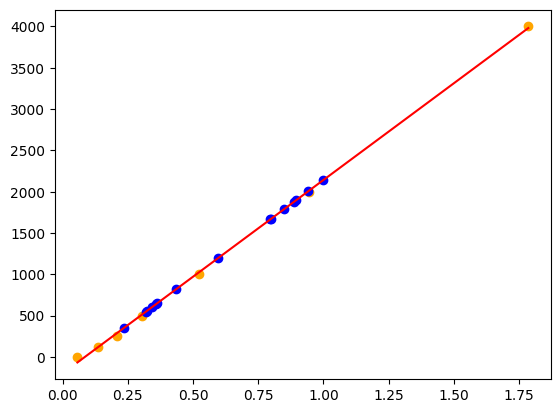

In [11]:
# {{{ 検量線グラフと同じ
# 検量線データのXから、最小値と最大値を取ってくる。
test_X = [[0.0565], [1.7855]]
# Xの値から、y(濃度)を予測。
test_y = model.predict(test_X)

# 直線を作成->表示
plt.plot(test_X, test_y, color="red")

# 元データを散布
plt.scatter(X, y, color="orange")
# }}}


# サンプルの予測データを青で散布
plt.scatter(sample_X, sample_y, color="blue")
plt.show()

### 更新したデータフレームの保存もできます。

In [12]:
save_name = "/content/predicted_protein_samples.csv"
sample_df.to_csv(save_name)